# Аудиоаналитика

Лабораторная работа №2: **Акустические признаки**

Студент: **Хо Куанг Чунг**

___

_Задачи:_
1. разбиваем на отрезки длинна - на ваше усмотрение строим пороговый классификатор, определяем на каком отрезке есть выстрел на каком нет
2. анализируем спектры отрезков  с выстрелом / без выстрела. подбираем  фильтр после которого пороговый классификатор станет лучше (больше разница между наличием/отсутствием целевого события) 

3. *если есть идеи как еще улучшить извлечение признаков чтобы сделать детектор более устойчивым к другим шумам - велком.

___

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

## Задание 1. Пороговый классификатор на примере детектора выстрела

**Функция отрисовки звукового сигнала во временной области**

In [18]:
def draw_waveform(wav, sr, figsize=(14, 5)):
    plt.figure(figsize=figsize)
    librosa.display.waveshow(wav, sr=sr)
    plt.show()

**Загрузить аудиофайл**

Sample rate: 16000


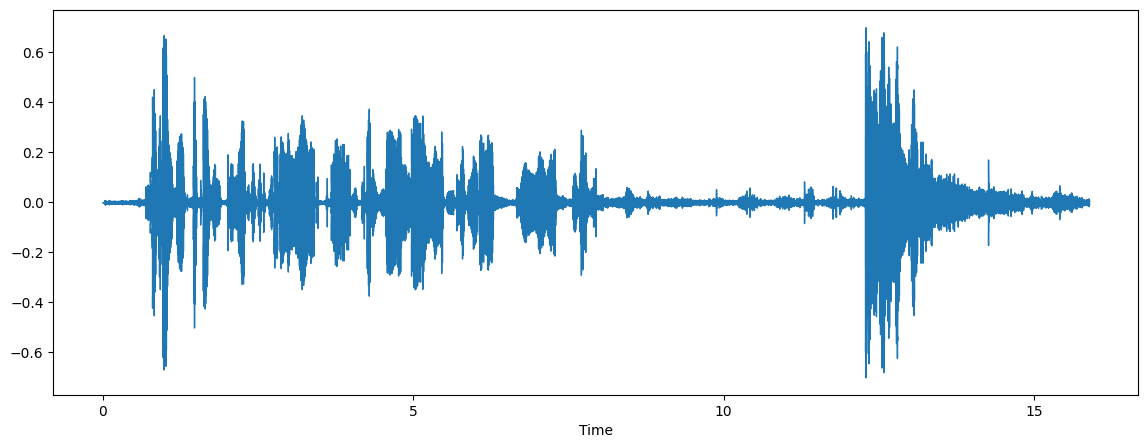

In [19]:
audio_path = 'Стрельба на улице.wav'
wav, sr = librosa.load(audio_path, sr=None)
print("Sample rate:", sr)
draw_waveform(wav, sr)

**Разделить звук на интервалы**

In [20]:
interval_duration = 1
interval_samples = int(sr * interval_duration)

**Построим амплитудный Фурье спектр для каждого окна**

In [21]:
spectrums = librosa.stft(wav, n_fft=interval_samples, hop_length=interval_samples)
amplitudes = np.abs(spectrums)
amplitudes.shape

(8001, 16)

**Рассчитать среднюю энергию для каждого интервала**

In [22]:
energies = np.sum(np.square(amplitudes), axis=0)

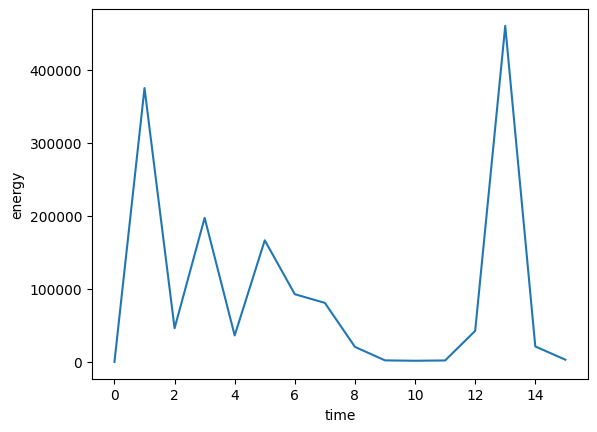

In [23]:
plt.plot(np.arange(0, len(energies)*interval_duration, interval_duration), energies)
plt.xlabel('time')
plt.ylabel('energy')
plt.show()

**Определить пороговое значение**

In [24]:
threshold = np.max(energies)*0.7

**Классифицировать интервалы**

In [25]:
shots = []
for i in range(len(energies)):
    if energies[i] > threshold:
        shots.append((i * interval_duration, (i+1)*interval_duration))

**Печатать интервалы с выстрелами**

In [26]:
if len(shots) > 0:
    print('Интервалы с выстрелами:')
    for shot in shots:
        print(shot)
else:
    print('В аудиофайле не обнаружено выстрелов.')

Интервалы с выстрелами:
(1, 2)
(13, 14)


> (1, 2) => шум

## Задание 2. Пороговый классификатор с применением фильтра

**Спектры отрезков  с выстрелом / без выстрел**

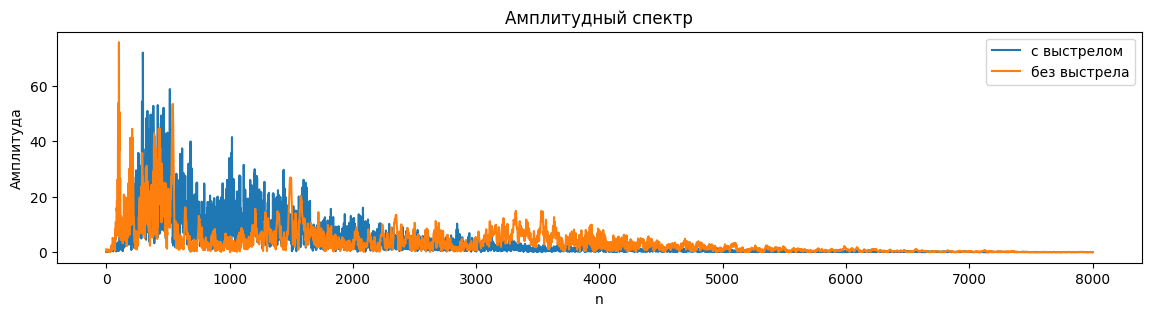

In [27]:
plt.figure(figsize=(14,3))
plt.title("Амплитудный спектр")
plt.plot(amplitudes.T[13], label="с выстрелом")
plt.plot(amplitudes.T[1], label="без выстрела")
plt.ylabel("Амплитуда")
plt.xlabel("n")
plt.legend()
plt.show()

> Подбираем фильтр [1000:2000]

In [28]:
energies = np.sum(np.square(amplitudes[1000:2000]), axis=0)

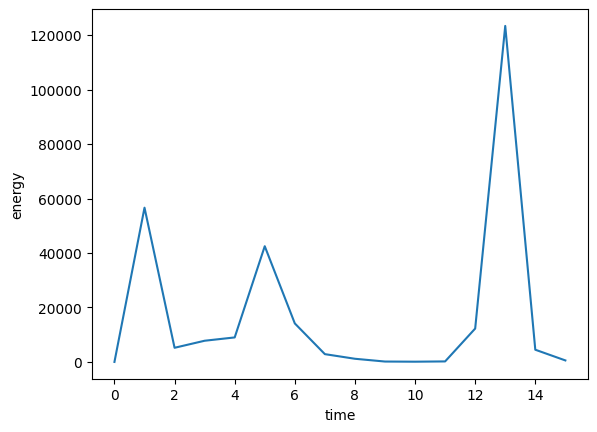

In [29]:
plt.plot(np.arange(0, len(energies)*interval_duration, interval_duration), energies)
plt.xlabel('time')
plt.ylabel('energy')
plt.show()

**Определить пороговое значение**

In [30]:
threshold = np.max(energies)*0.7

**Классифицировать интервалы**

In [31]:
shots = []
for i in range(len(energies)):
    if energies[i] > threshold:
        shots.append((i * interval_duration, (i+1)*interval_duration))

**Печатать интервалы с выстрелами**

In [32]:
if len(shots) > 0:
    print('Интервалы с выстрелами:')
    for shot in shots:
        print(shot)
else:
    print('В аудиофайле не обнаружено выстрелов.')

Интервалы с выстрелами:
(13, 14)
